In [42]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('leaves_training_final.csv')
test_df = pd.read_csv('leaves_testing_final.csv')

print("Training Data Info:")
print(train_df.info())
print("\nTraining Data Head:")
print(train_df.head())

print("\nTesting Data Info:")
print(test_df.info())
print("\nTesting Data Head:")
print(test_df.head())

print("\nMissing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in testing data:")
print(test_df.isnull().sum())

print("\nTraining data description:")
print(train_df.describe())

print("\nTesting data description:")
print(test_df.describe())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         400 non-null    object 
 1   length       400 non-null    float64
 2   width        400 non-null    float64
 3   texture      400 non-null    object 
 4   edge         400 non-null    object 
 5   arrangement  400 non-null    object 
 6   shape        400 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.0+ KB
None

Training Data Head:
     name  length  width texture      edge arrangement     shape
0  seetha     6.0    2.5  smooth  straight   alternate  elliptic
1  seetha     6.0    2.6  smooth  straight   alternate  elliptic
2  seetha     5.3    2.4  smooth  straight   alternate  elliptic
3  seetha     5.2    2.3  smooth  straight   alternate  elliptic
4  seetha     3.7    2.0  smooth  straight   alternate  elliptic

Testing Data Info:
<class 'p

In [53]:
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv('leaves_training_final.csv')
test_df = pd.read_csv('leaves_testing_final.csv')

for col in ['length', 'width']:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

print(train_df.dtypes)
print(test_df.dtypes)

train_df['length_width_ratio'] = train_df['length'] / train_df['width']
test_df['length_width_ratio'] = test_df['length'] / test_df['width']

print("\nAdded length_width_ratio to both train and test datasets.")

scaler = MinMaxScaler()

features_to_scale = ['length', 'width', 'length_width_ratio']

train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

print("\nTraining data after scaling:")
print(train_df.head())

def add_gaussian_noise(df, features, mean=0, std=0.01):
    noisy_df = df.copy()
    for feature in features:
        noise = np.random.normal(mean, std, size=noisy_df[feature].shape)
        noisy_df[feature] += noise
    return noisy_df

augmented_df = add_gaussian_noise(train_df, features_to_scale)

train_augmented_df = pd.concat([train_df, augmented_df], axis=0).reset_index(drop=True)

print("\nTraining data size after augmentation:", train_augmented_df.shape)
train_augmented_df.to_csv('train_augmented.csv', index=False)
print("\nAugmented training data saved to 'train_augmented.csv'.")

name            object
length         float64
width          float64
texture         object
edge            object
arrangement     object
shape           object
dtype: object
name            object
length         float64
width          float64
texture         object
edge            object
arrangement     object
shape           object
dtype: object

Added length_width_ratio to both train and test datasets.

Training data after scaling:
     name    length     width texture      edge arrangement     shape  \
0  seetha  0.137931  0.069401  smooth  straight   alternate  elliptic   
1  seetha  0.137931  0.072555  smooth  straight   alternate  elliptic   
2  seetha  0.115987  0.066246  smooth  straight   alternate  elliptic   
3  seetha  0.112853  0.063091  smooth  straight   alternate  elliptic   
4  seetha  0.065831  0.053628  smooth  straight   alternate  elliptic   

   length_width_ratio  
0            0.324717  
1            0.310551  
2            0.295302  
3            0.303364  
4 


Columns available: Index(['name', 'length', 'width', 'texture', 'edge', 'arrangement', 'shape',
       'length_width_ratio'],
      dtype='object')


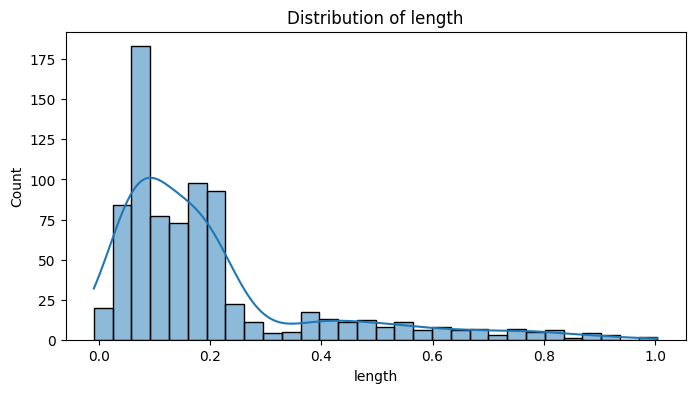

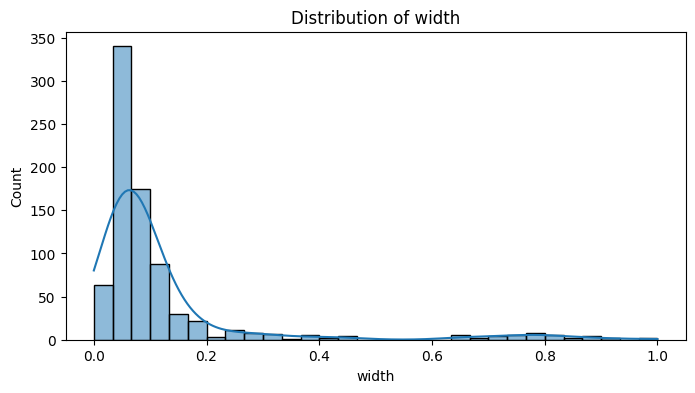

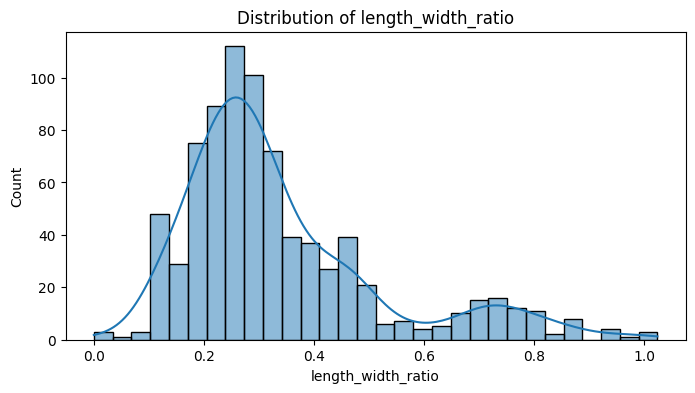

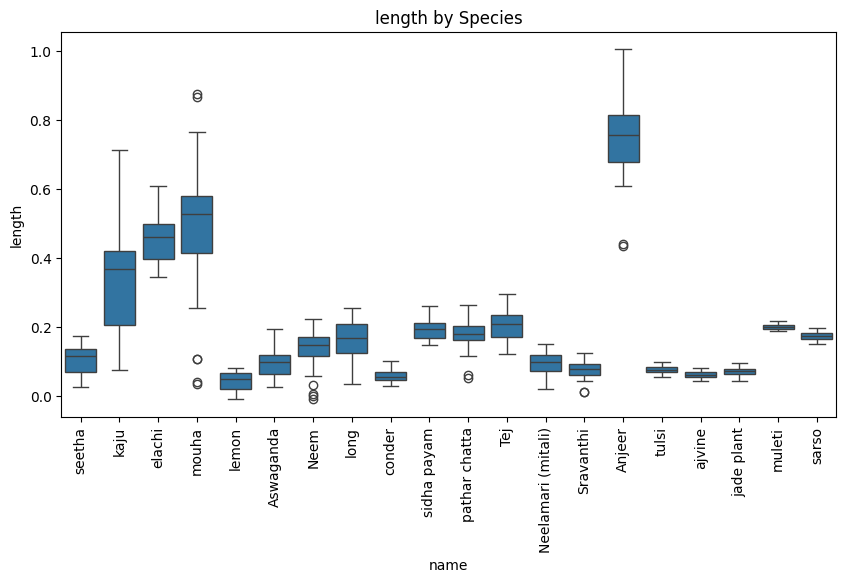

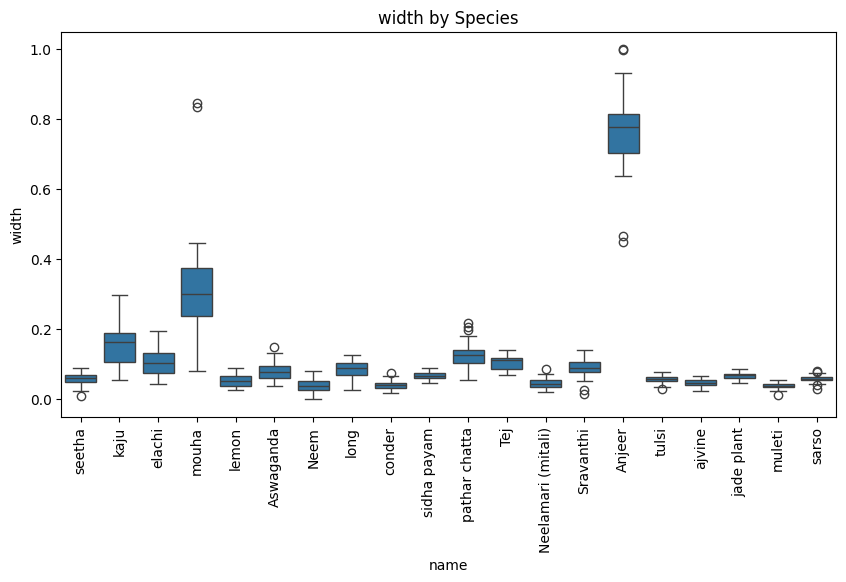

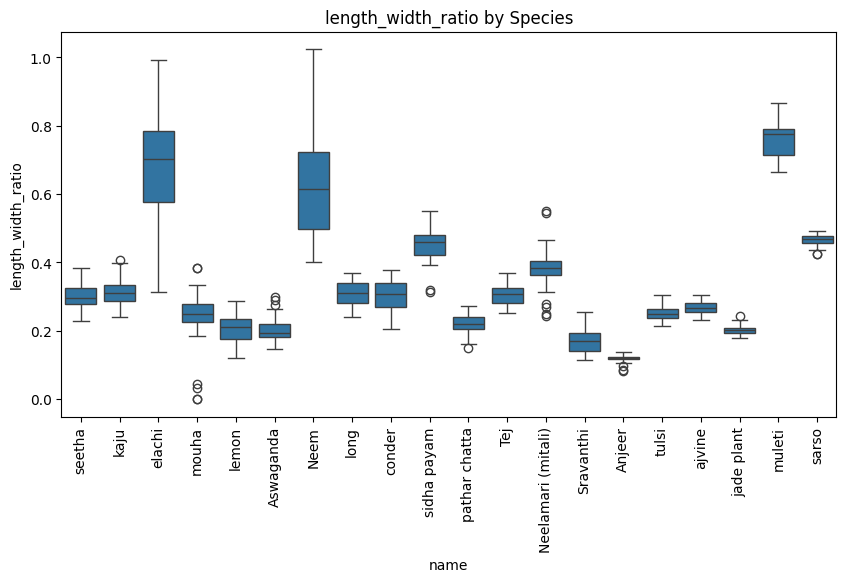

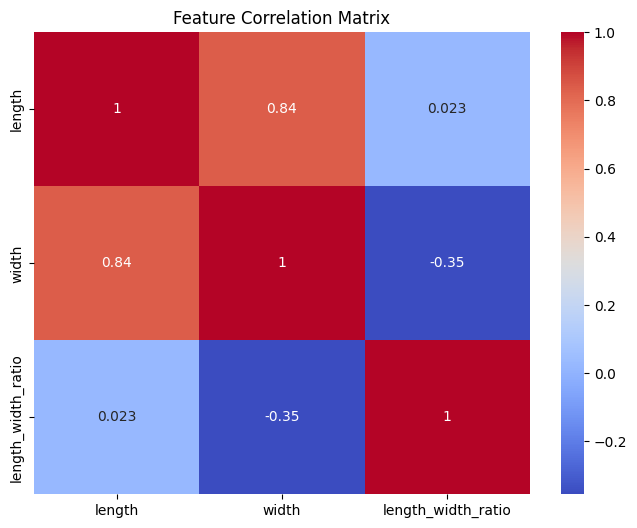

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

train_augmented_df = pd.read_csv('train_augmented.csv')

print("\nColumns available:", train_augmented_df.columns)
features = ['length', 'width', 'length_width_ratio']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_augmented_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_augmented_df, x='name', y=feature)
    plt.title(f'{feature} by Species')
    plt.xticks(rotation=90)
    plt.show()

if 'species' in train_augmented_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train_augmented_df, x='leaf_length', y='leaf_width', hue='species', palette='tab10', s = 50)
    plt.title('Leaf Length vs Leaf Width by Species')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

plt.figure(figsize=(8,6))
corr_matrix = train_augmented_df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

if 'species' in train_augmented_df.columns:
    sample_df = train_augmented_df.sample(n=500, random_state=42) if len(train_augmented_df) > 500 else train_augmented_df
    sns.pairplot(sample_df, hue='species', vars=features)
    plt.show()


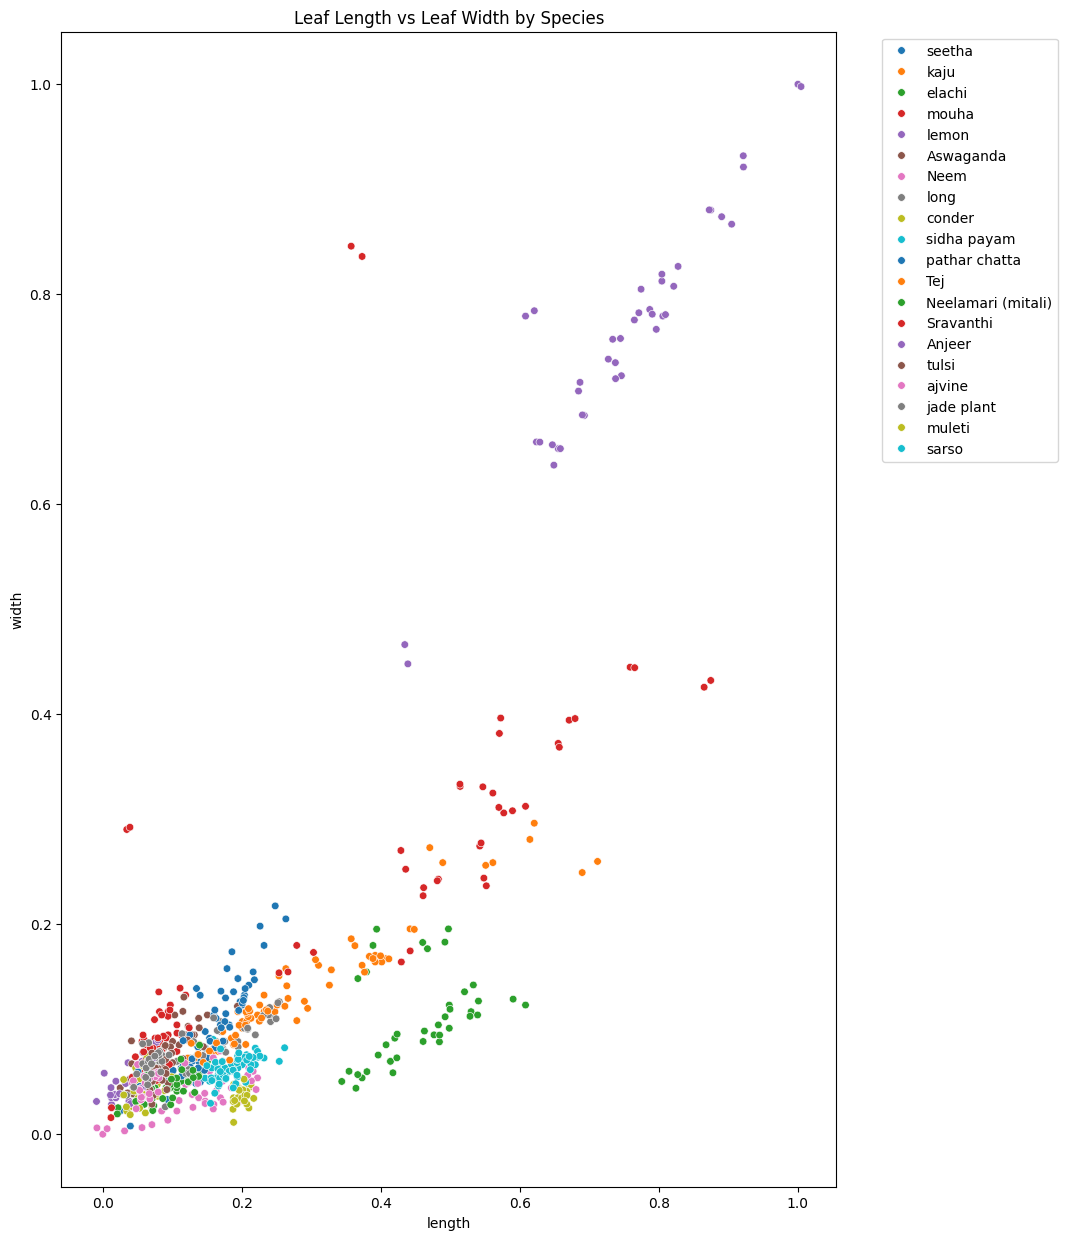

In [48]:
scatter_df = train_augmented_df.dropna(subset=['length', 'width', 'name'])

plt.figure(figsize=(10, 15))
sns.scatterplot(data=scatter_df, x='length', y='width', hue='name', palette='tab10', s = 30)
plt.title('Leaf Length vs Leaf Width by Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


Running KMeans clustering with k=5...


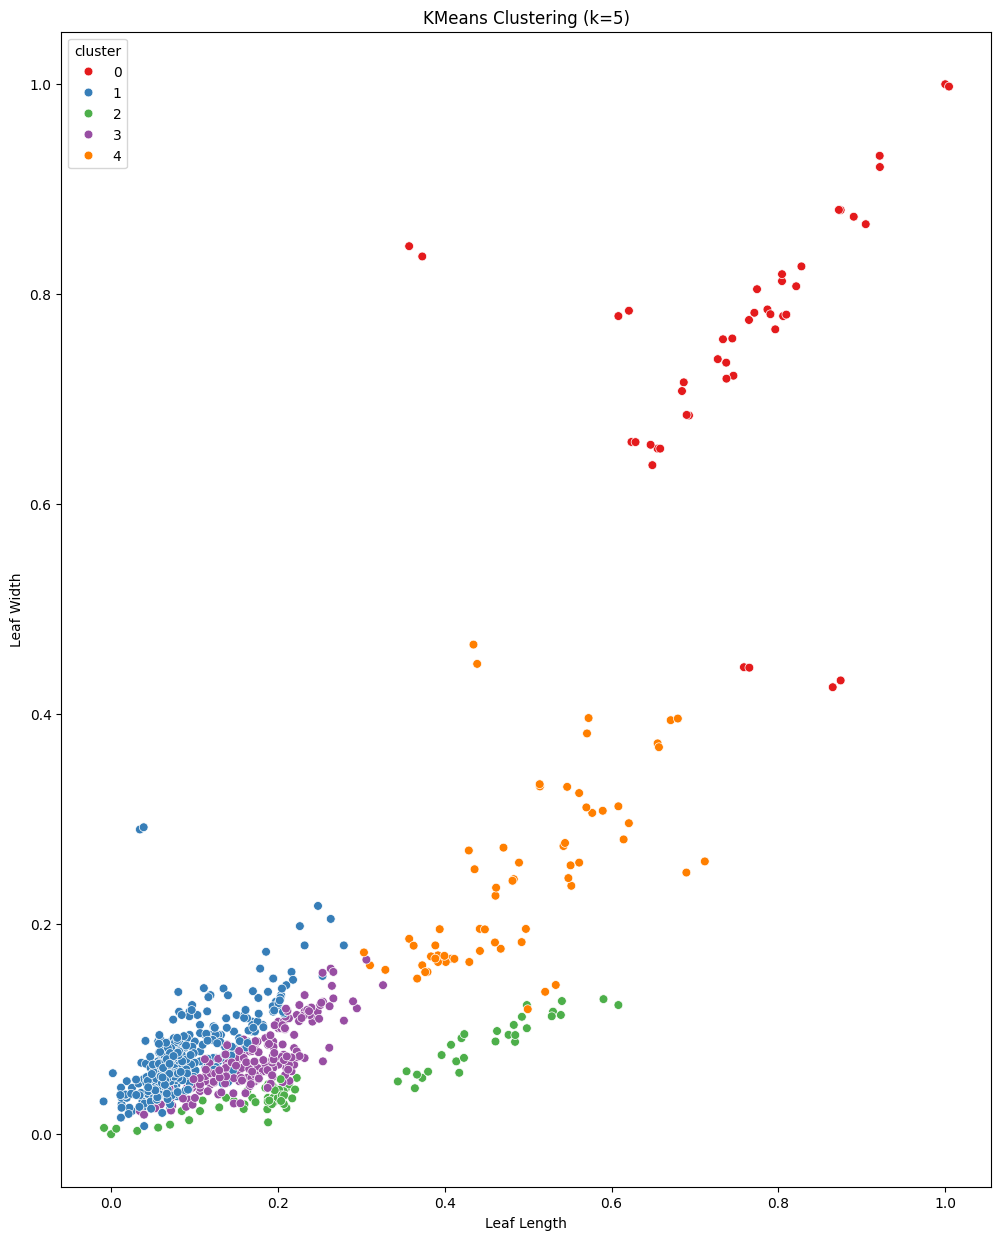


Silhouette Score for clustering (k=5): 0.4727


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

clustering_features = ['length', 'width', 'length_width_ratio']

X = train_augmented_df[clustering_features].dropna()

print("\nRunning KMeans clustering with k=5...")

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
X['cluster'] = kmeans.fit_predict(X[clustering_features])

plt.figure(figsize=(12,15))
sns.scatterplot(data=X, x='length', y='width', hue='cluster', palette='Set1', s = 40)
plt.title(f'KMeans Clustering (k={k})')
plt.xlabel('Leaf Length')
plt.ylabel('Leaf Width')
plt.show()

silhouette_avg = silhouette_score(X[clustering_features], X['cluster'])
print(f"\nSilhouette Score for clustering (k={k}): {silhouette_avg:.4f}")


Random Forest Classification Report:
                    precision    recall  f1-score   support

            Anjeer       1.00      1.00      1.00         5
         Aswaganda       1.00      1.00      1.00         5
Neelamari (mitali)       0.67      0.40      0.50         5
              Neem       1.00      1.00      1.00         5
         Sravanthi       1.00      1.00      1.00         5
               Tej       1.00      1.00      1.00         5
            ajvine       1.00      1.00      1.00         5
            conder       0.67      0.80      0.73         5
            elachi       1.00      1.00      1.00         5
        jade plant       1.00      1.00      1.00         5
              kaju       1.00      1.00      1.00         5
             lemon       0.67      0.80      0.73         5
              long       0.50      0.40      0.44         5
             mouha       0.83      1.00      0.91         5
            muleti       1.00      1.00      1.00         5
 

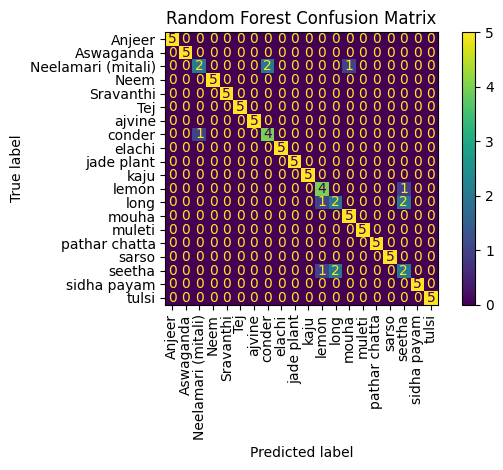


KNN Classification Report:
                    precision    recall  f1-score   support

            Anjeer       1.00      1.00      1.00         5
         Aswaganda       1.00      1.00      1.00         5
Neelamari (mitali)       0.75      0.60      0.67         5
              Neem       1.00      1.00      1.00         5
         Sravanthi       1.00      1.00      1.00         5
               Tej       1.00      1.00      1.00         5
            ajvine       1.00      1.00      1.00         5
            conder       0.67      0.80      0.73         5
            elachi       1.00      1.00      1.00         5
        jade plant       1.00      1.00      1.00         5
              kaju       1.00      1.00      1.00         5
             lemon       0.71      1.00      0.83         5
              long       1.00      0.40      0.57         5
             mouha       1.00      1.00      1.00         5
            muleti       1.00      1.00      1.00         5
     pathar

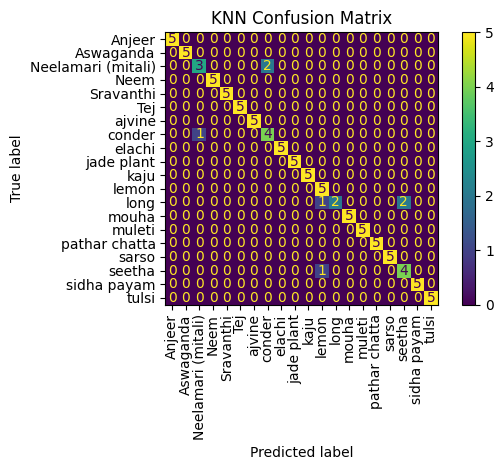


SVM Classification Report:
                    precision    recall  f1-score   support

            Anjeer       1.00      1.00      1.00         5
         Aswaganda       1.00      1.00      1.00         5
Neelamari (mitali)       0.75      0.60      0.67         5
              Neem       1.00      1.00      1.00         5
         Sravanthi       1.00      1.00      1.00         5
               Tej       1.00      1.00      1.00         5
            ajvine       1.00      1.00      1.00         5
            conder       0.67      0.80      0.73         5
            elachi       1.00      1.00      1.00         5
        jade plant       1.00      1.00      1.00         5
              kaju       1.00      1.00      1.00         5
             lemon       0.71      1.00      0.83         5
              long       0.50      0.40      0.44         5
             mouha       1.00      1.00      1.00         5
            muleti       1.00      1.00      1.00         5
     pathar

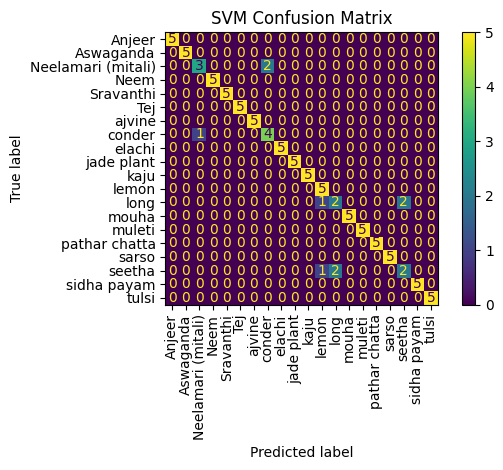

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("leaves_training_final.csv")
df.rename(columns={'name': 'species'}, inplace=True)

X = df.drop('species', axis=1)
y = df['species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

numeric_features = ['length', 'width']
categorical_features = ['texture', 'edge', 'arrangement', 'shape']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='rbf', probability=True)
}

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
    disp.plot(xticks_rotation=90)
    plt.title(f"{name} Confusion Matrix")
    plt.tight_layout()
    plt.show()